### 4. Significativité

Ce notebook montre la correlation et la significativité entre les variables "ingrédients" et "pas" deux fois, la première fois sans élimination des données abérrants, la deuxième fois avec leur élimination. Étant donné que cette tâche est de question/answering, nous n'avons pas dû faire l'augmentation du corpus, qui peut être nécessaire pour la classification. Après, montre une metrique d'évaluation non utilisée dans le dataset d'exemple. C'est la similarité du cosinus avec vectorisation TF-IDF et emploi de stopwords. Le coefficient de correlation a été aussi fait avec cette vectorisation, juste pour voir les changements lors de l'utilisation des vecteurs, ce qui est util pour ce cas. Finalement, le corpus a été divisé en train et test.
Pour le faire il utilise les librairies _matplotlib, pandas, scipy, dataset, spacy, datasets, scikit.learn et nltk._

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### Correlation sans élimination des données abérrantes

In [12]:
dataset = load_dataset("csv", data_files="recettes_1.csv", split="train").to_pandas()


 correlation_pearson: 0.1809312647912141
p_value pearson: 0.08789889192911238
 correlation_spearman: 0.27740232428860034
p_value Spearman: 0.008119774914482236


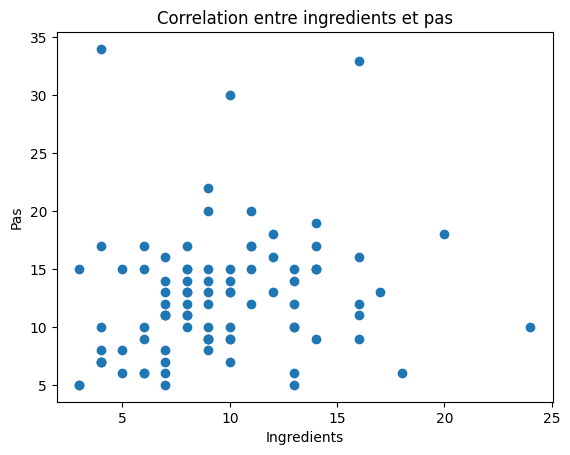

In [13]:
num_ingredients = dataset["ingredients"].apply(lambda x: len(x.split(',')))
num_pas = dataset["pas"].apply(lambda x: len(x.split('.')))


corr_pearson, p_pearson = scipy.stats.pearsonr(num_ingredients, num_pas)

corr_spearman, p_spearman = scipy.stats.spearmanr(num_ingredients, num_pas)

print(" correlation_pearson:", corr_pearson)
print("p_value pearson:", p_pearson)
print(" correlation_spearman:", corr_spearman)
print("p_value Spearman:", p_spearman)


plt.scatter(num_ingredients, num_pas)
plt.xlabel("Ingredients")
plt.ylabel("Pas")
plt.title("Correlation entre ingredients et pas")
plt.show()


#### Correlation avec l'élimination des données abérrantes 

Correlation Pearson: 0.28086291403403574
p-value Pearson: 0.008807067519354348
Correlation Spearman: 0.3086957188623983
p-value Spearman: 0.0038302044382782134


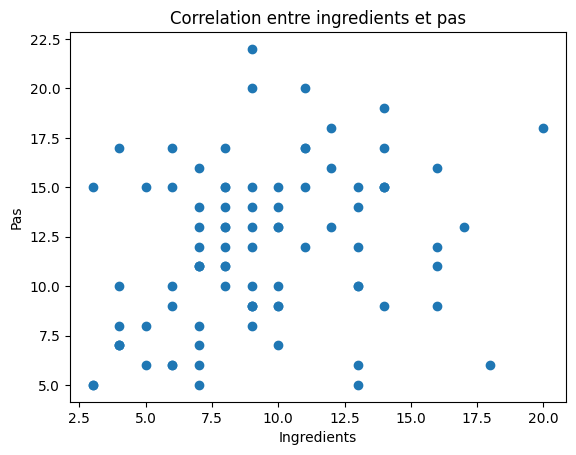

In [14]:
'''
Crée un seuil pour ne pas prendre en compte plus de 20 ingrédients et plus de 25 pas
'''
num_ingredients = dataset["ingredients"].apply(lambda x: len(x.split(',')))
num_pas = dataset["pas"].apply(lambda x: len(x.split('.')))


dataset['num_ingredients'] = num_ingredients
dataset['num_pas'] = num_pas


filtered_dataset = dataset.query('num_ingredients <= 20 and num_pas <= 25')


num_ingredients_filtered = filtered_dataset['num_ingredients']
num_pas_filtered = filtered_dataset['num_pas']

corr_pearson, p_pearson = scipy.stats.pearsonr(num_ingredients_filtered, num_pas_filtered)
corr_spearman, p_spearman = scipy.stats.spearmanr(num_ingredients_filtered, num_pas_filtered)

print("Correlation Pearson:", corr_pearson)
print("p-value Pearson:", p_pearson)
print("Correlation Spearman:", corr_spearman)
print("p-value Spearman:", p_spearman)


plt.scatter(num_ingredients_filtered, num_pas_filtered)
plt.xlabel("Ingredients")
plt.ylabel("Pas")
plt.title("Correlation entre ingredients et pas")
plt.show()

#### Correlation avec réprésentation TF-IDF et similarité du cosinus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maria23paz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 correlation_pearson: 0.2980738740812193
p_value pearson: 0.0
 correlation_spearman: 0.31532313647496135
p_value Spearman: 0.0
similarite_cosinus: [[0.37829711 0.12451226 0.11258161 ... 0.02206709 0.13848225 0.14399568]
 [0.0978477  0.31205425 0.01165761 ... 0.05357084 0.08592936 0.08107704]
 [0.09541472 0.04265842 0.62380829 ... 0.02694616 0.05277545 0.02496933]
 ...
 [0.01536632 0.03809524 0.01474273 ... 0.30174264 0.04539381 0.        ]
 [0.05940485 0.0860891  0.07548655 ... 0.09757866 0.52510802 0.14226981]
 [0.03832696 0.11843597 0.         ... 0.00245282 0.21684009 0.41754061]]


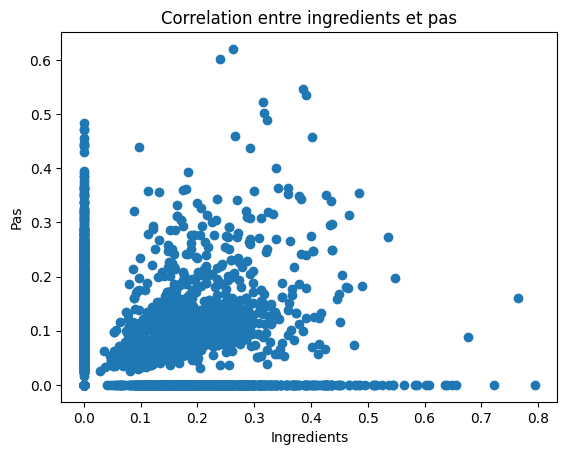

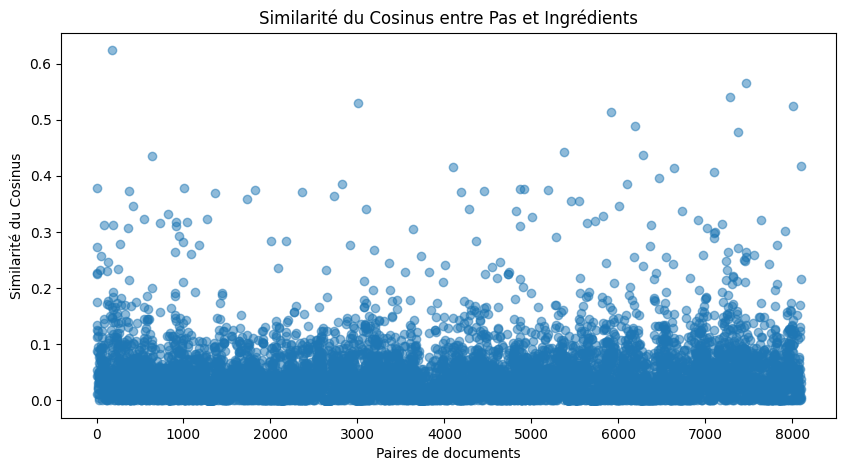

In [20]:
'''
Vectorise en réprésentation TF-IDF pour calculer la correlation et la similarité. 
'''
import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')

pas_recettes=[]   
for recette in dataset["pas"]:
    pas_recettes.append(recette.lower())
texte_pas = [''.join(lista) for lista in pas_recettes]

ingredients=[]
for ingredient in dataset["ingredients"]:
    ingredients.append(ingredient)
texte_recettes = [''.join(liste) for liste in ingredients]

stop_words = stopwords.words('spanish')

vectorizer = TfidfVectorizer(stop_words=stop_words)
vecteur_1 = vectorizer.fit_transform(texte_pas).toarray()
vecteur_2 = vectorizer.transform(texte_recettes).toarray()

cosine_sim = cosine_similarity(vecteur_1, vecteur_2)
vecteur_1_flat = vecteur_1.flatten()
vecteur_2_flat = vecteur_2.flatten()

corr_pearson, p_pearson = scipy.stats.pearsonr(vecteur_1_flat, vecteur_2_flat)
corr_spearman, p_spearman = scipy.stats.spearmanr(vecteur_1_flat, vecteur_2_flat)


print(" correlation_pearson:", corr_pearson)
print("p_value pearson:", p_pearson)
print(" correlation_spearman:", corr_spearman)
print("p_value Spearman:", p_spearman)
print("similarite_cosinus:",cosine_sim)


plt.scatter(vecteur_2_flat, vecteur_1_flat)
plt.xlabel("Ingredients")
plt.ylabel("Pas")
plt.title("Correlation entre ingredients et pas")
plt.show()

cosine_sim_points = cosine_sim.flatten()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(cosine_sim_points)), cosine_sim_points, alpha=0.5)
plt.xlabel('Paires de documents')
plt.ylabel('Similarité du Cosinus')
plt.title('Similarité du Cosinus entre Pas et Ingrédients')
plt.show()

#### Division corpus __train__ et __test__

In [63]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.2)
print(len(train_data))
print(len(test_data))

72
18
